<a href="https://colab.research.google.com/github/sada1908/edyoda_assign/blob/main/edyoda_Assign05_GenAIcodecreation%26Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🤖 Assignment 5: GenAI Python Code Generation Agent

### 🎯 Objective:
- Use GPT-3.5/4 via OpenAI API to generate Python code for plotting a sine wave.
- Execute the code and validate its correctness.
- Review code quality in markdown.

In [2]:
# Step 1: Install required libraries
!pip install openai matplotlib

In [3]:
# Step 2: Import libraries
import openai
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Step 3: Set your OpenAI API key
from google.colab import userdata
openai.api_key = userdata.get('OPENAI_API_KEY')

In [6]:
# Step 4: Ask GPT to generate code
prompt = """
Write a Python function that:
- Plots a sine wave using matplotlib.
- Uses numpy to create x values from 0 to 2π.
- Adds labels and a grid.
- Shows the plot.
Include comments and make it clean.
"""

In [11]:
client = openai.OpenAI(api_key=openai.api_key)
response = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-3.5-turbo",
)

In [12]:
generated_code = response.choices[0].message.content
print(generated_code)

```python
import numpy as np
import matplotlib.pyplot as plt

def plot_sine_wave():
    # Create x values from 0 to 2π using numpy
    x = np.linspace(0, 2*np.pi, 100)  # 100 points from 0 to 2π
    
    # Compute y values for the sine wave
    y = np.sin(x)
    
    # Plot the sine wave
    plt.plot(x, y)
    
    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.title('Sine Wave')
    
    # Add grid
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Call the function to plot the sine wave
plot_sine_wave()
```

This function will plot a sine wave using matplotlib with x values ranging from 0 to 2π, add labels, a title, and a grid, and finally show the plot.


In [14]:
# Clean the GPT-generated code
if generated_code.startswith("```python"):
    cleaned_code = generated_code.strip("`").split("python")[1].rsplit("```")[0].strip()
else:
    cleaned_code = generated_code.strip("`").strip()

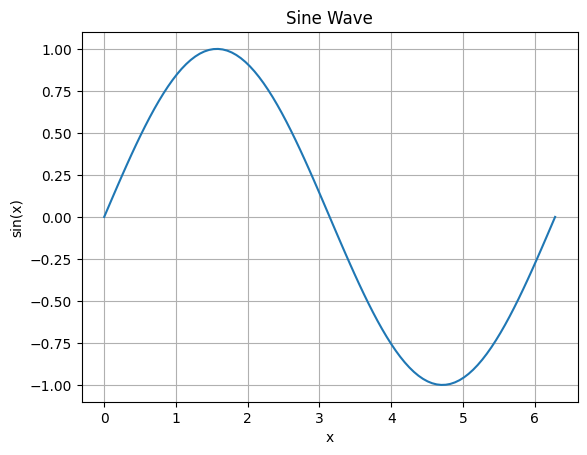

In [15]:
exec(cleaned_code)

In [16]:
# Step 8: Ask GPT to review the generated code
review_prompt = f"""
Review the following Python code for plotting a sine wave.
Provide feedback on correctness, style, and clarity.
Format the review in markdown.
{cleaned_code}
"""

review_response = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": review_prompt,
        }
    ],
    model="gpt-3.5-turbo",
)

code_review = review_response.choices[0].message.content

print("\n------ Code Review -----")
print(code_review)


------ Code Review -----
## Feedback

### Correctness
The code is correct in terms of plotting a sine wave using numpy and matplotlib. It generates x values from 0 to 2π, computes the corresponding y values for the sine wave, and then plots the sine wave.

### Style
1. Function definition: The function `plot_sine_wave()` is appropriately named and follows the naming convention for functions in Python.
2. Comments: Good use of comments to explain the purpose of each step.
3. Variable names: Variable names like `x` and `y` are concise and appropriately describe their content.
4. Function call: The function is called correctly at the end of the script.

### Clarity
1. The code is clear and easy to understand.
2. Each step is well-segmented with comments, making it easy to follow the logic of the program.
3. Plot labels, title, and grid are added to enhance the clarity of the visualization.

Overall, the code is well-structured, in terms of correctness, style, and clarity.

```markdown
##